In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Reading Data Into Numpy

## Using Colab?

In [7]:
# If you are using google colab, be sure to update this boolean variable
# Also make sure to include the location of the cloned repository files in your google drive
# as the google drive dir. An example is shown below
using_colab = False
google_drive_dir = "My Drive/colab/CNN-Research/data"

if using_colab:

    
    from google.colab import drive
    
    # Connect our colab document to google drive
    # This allows us to access data from our drive like csv files
    drive.mount('/content/drive')
    
    # Establish location for our data
    folder = os.path.join("/content/drive", google_drive_dir)
    
else:
    # If this notebook is run locally we don't need to worry about mounting google drive
    # The folder is specified such that it is assumed this notebook is run from CNN-Research folder
    folder = "./data"

In [6]:
filename = "ec_postpro_merged.csv"
df = pd.read_csv(os.path.join(folder, filename), delimiter=",")
df = df.iloc[95:]

df.head()

,Unnamed: 0,/POSTPRO/CHDMC006/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/CHDMC006/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/.1,/POSTPRO/CHSWP003/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/CHVCT000/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/OLD_MID/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/ROLD024/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/ROLD059/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/RSAC064/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/RSAC075/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,...,/POSTPRO/RSAN058/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/RSAN072/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/RSMKL008/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLCBN002/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLDUT007/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLMZU011/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLMZU025/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLSUS012/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SLTRM004/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/,/POSTPRO/SSS/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/
95,2000-01-02 00:00:00,777.0,777.0,-3.402823e+38,-3.402823e+38,883.0,-3.402823e+38,-3.402823e+38,16486.0,6790.0,...,-3.402823e+38,-3.402823e+38,167.0,-3.402823e+38,-3.402823e+38,10050.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
96,2000-01-02 00:15:00,791.0,791.0,-3.402823e+38,-3.402823e+38,886.0,-3.402823e+38,-3.402823e+38,16605.5,7005.0,...,-3.402823e+38,-3.402823e+38,167.0,-3.402823e+38,-3.402823e+38,10020.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
97,2000-01-02 00:30:00,768.0,768.0,-3.402823e+38,-3.402823e+38,887.0,-3.402823e+38,-3.402823e+38,16725.0,7220.0,...,-3.402823e+38,-3.402823e+38,167.0,-3.402823e+38,-3.402823e+38,9990.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
98,2000-01-02 00:45:00,766.0,766.0,-3.402823e+38,-3.402823e+38,890.0,-3.402823e+38,-3.402823e+38,16844.5,7435.0,...,-3.402823e+38,-3.402823e+38,166.0,-3.402823e+38,-3.402823e+38,9960.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
99,2000-01-02 01:00:00,798.0,798.0,-3.402823e+38,-3.402823e+38,890.0,-3.402823e+38,-3.402823e+38,16964.0,7650.0,...,-3.402823e+38,-3.402823e+38,166.0,-3.402823e+38,-3.402823e+38,9930.0,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38


In [3]:
col_names = list(df.columns)
print(col_names)

station_name= "/POSTPRO/RSAN018/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/"

['Unnamed: 0', '/POSTPRO/CHDMC006/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/CHDMC006/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/.1', '/POSTPRO/CHSWP003/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/CHVCT000/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/OLD_MID/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/ROLD024/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/ROLD059/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAC064/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAC075/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAC081/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAC092/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAC101/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAN007/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAN018/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAN032/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/POSTPRO/RSAN037/EC/01JAN2000 - 01DEC2019/15MIN/OBSERVED/', '/P

In [4]:
# Numpy array of just our column
rsan018 = df[station_name].to_numpy()

# Replace any small values with nan
rsan018[rsan018 < 1] = np.nan

num_data_points = rsan018.size
num_missing_data = np.isnan(rsan018).sum()

print("Number of datapoints:", num_data_points)
print("Number of nans:", num_missing_data)

Number of datapoints: 701185
Number of nans: 1653


In [5]:
# Search through the data to find sections of 500 samples without any nans
raw_salinity_data = []
consecutive_samples = 500
i = 0

while i < num_data_points - consecutive_samples:
    
    # Check if this section of 500 is clear of nans
    section = rsan018[i:i+consecutive_samples]
    
    if np.isnan(section).sum() == 0:
        # There is no nans
        raw_salinity_data.append(section)
        
        # Increment i by number of consecutive samples
        i += consecutive_samples
    else:
        
        # We have nans
        i += 1

# Convert Salinity data to numpy array
print(type(raw_salinity_data[0]))
raw_salinity_data = np.array(raw_salinity_data)

<class 'numpy.ndarray'>


In [6]:
print(raw_salinity_data.shape)

(1287, 500)


### Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
salinity_data = scaler.fit_transform(raw_salinity_data)

In [8]:
# Replace any values that are supposed to be masked with median
masked_salinity = np.copy(salinity_data)
mask = np.ones_like(salinity_data)

missing_rate = 0.2
samples = salinity_data.shape[1]
num_missing = int(np.floor(missing_rate*samples))

for i in range(salinity_data.shape[0]):
    salinity_window = salinity_data[i]
    window_median = np.median(salinity_window)
    
    # Mask the values from random index
    n = np.random.randint(0, samples-num_missing)
    masked_salinity[i, n:n+num_missing] = window_median
    mask[i, n:n+num_missing] = 0
    

print(salinity_data.shape)
print(mask.shape)

(1287, 500)
(1287, 500)


## Writing Data to CSV 

In [9]:
WRITE_TO_CSV = False
READ_FROM_CSV = True

# Set the filenames for our csv's
folder = "C:/Users/Dylan/Documents/Spring 2021/DWR Research/Delta-Modelling-ANN/data/cs_v_ann_test/"
salinity_filename = "rsan018_data.csv"
mask_filename = "rsan018_mask.csv"

if WRITE_TO_CSV:
    col_names = [f"sample {num}"for num in range(0, consecutive_samples)]
    index_labels = list(range(0, salinity_data.shape[0]))
    
    # Create pandas dataframe from 
    salinity_data_df = pd.DataFrame(data=raw_salinity_data, index=index_labels, columns=col_names)
    mask_df = pd.DataFrame(data=mask, index=index_labels, columns=col_names)
    
    # Write to file
    salinity_data_df.to_csv(path_or_buf=folder+salinity_filename, na_rep="N/A")
    mask_df.to_csv(path_or_buf=folder+mask_filename, na_rep="N/A")
    
if READ_FROM_CSV:
    
    # Read from file
    salinity_df = pd.read_csv(folder+salinity_filename).iloc[:, 1:]
    mask_df = pd.read_csv(folder+mask_filename).iloc[:, 1:]
    
    # Scale the data
    scaler = MinMaxScaler()
    salinity_data = scaler.fit_transform(salinity_df.to_numpy())
    mask = mask_df.to_numpy()
    
    # Mask the data
    masked_salinity = np.copy(salinity_data)
    for i in range(salinity_data.shape[0]):
        window_mask = mask[i]
        window_data = masked_salinity[i]
        
        # Replace data with nan
        window_data[window_mask == 0] = np.nan
        
        # Find median value for window
        median_val = np.nanmedian(window_data)
        
        # Replace nans with median
        window_data[window_mask == 0] = median_val
        
        # Replace masked salinity with this array
        masked_salinity[i] = window_data


### Split Data into Train and Test

In [10]:
# Reserve a few windows for plotting
figs_to_plot = 3
plot_mask = mask[:figs_to_plot]
plot_masked_sal = masked_salinity[:figs_to_plot]
plot_true = salinity_data[:figs_to_plot]

# Split the rest of the data
train_salinity, test_salinity, train_mask, test_mask, truth_train, truth_test = train_test_split(masked_salinity[figs_to_plot:], 
                                                                                                 mask[figs_to_plot:], 
                                                                                                 salinity_data[figs_to_plot:], 
                                                                                                 test_size=0.3)

## Create Neural Network

In [11]:
# Model Hyper Parameters
EPOCHS = 500
ACT_FUNC = "relu"
VAL_SPLIT = 0.2
BATCH_SIZE = 16

In [12]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch/EPOCHS > 0.9:
        lr *= 0.5e-3
    elif epoch/EPOCHS > .8:
        lr *= 1e-3
    elif epoch/EPOCHS > .6:
        lr *= 1e-2
    elif epoch/EPOCHS > .4:
        lr *= 1e-1
    elif epoch/EPOCHS < .05:
        lr *= epoch/5
    if epoch/EPOCHS < .05:
        print('Learning rate: ', lr)
    elif epoch/EPOCHS in [0.9, 0.8, 0.6, 0.4]:
        print('Learning rate changed to: ', lr)
    return lr

In [13]:
# Inputs to this network will be the salinity values and the salinity mask
consecutive_samples = train_salinity.shape[1]

salinity_input = tf.keras.Input(shape=(consecutive_samples), name="Salinity_Input")
mask_input = tf.keras.Input(shape=(consecutive_samples), name="Mask")

# Reshape my inputs
sal = tf.keras.layers.Reshape(target_shape=(consecutive_samples, 1))(salinity_input)
mask = tf.keras.layers.Reshape(target_shape=(consecutive_samples, 1))(mask_input)

# Concatenate my two inputs together
x = tf.keras.layers.Concatenate(axis=2)([sal, mask])

# 1D Convolution
x = tf.keras.layers.Conv1D(filters=4, kernel_size=5, strides=2, activation=ACT_FUNC)(x)

# Adding batch normalization after Conv
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Convolutional Layer
# Causal padding maintains temporal order of data
x = tf.keras.layers.Reshape(target_shape=(-1, 4))(x)
x = tf.keras.layers.Conv1D(filters=4, kernel_size=4, strides=2, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Convolutional Layer
# Causal padding maintains temporal order of data
x = tf.keras.layers.Conv1D(filters=5, kernel_size=4, strides=2, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Convolutional Layer
# Same padding maintains the 'same' shape between input and output of this layer
x = tf.keras.layers.Conv1D(filters=5, padding="same", kernel_size=3, strides=1, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Convolutional Layer
# Same padding maintains the 'same' shape between input and output of this layer
x = tf.keras.layers.Conv1D(filters=5, padding="same", kernel_size=3, strides=1, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)
rows = x.get_shape()[1]
cols = x.get_shape()[2]

# Dense Layer
x = tf.keras.layers.Flatten()(x)
dense_nodes = x.get_shape()[1]
x = tf.keras.layers.Dense(dense_nodes, activation=ACT_FUNC)(x)

# 1D Convolution
x = tf.keras.layers.Reshape(target_shape=(rows, cols))(x)
x = tf.keras.layers.Conv1D(filters=5, padding="same", kernel_size=3, strides=1, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Convolutional Layer
# Same padding maintains the 'same' shape between input and output of this layer
x = tf.keras.layers.Conv1D(filters=5, padding="same", kernel_size=3, strides=1, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# 1D Transpose Convolutional Layer
x = tf.keras.layers.Conv1DTranspose(filters=4, kernel_size=7, strides=2, activation=ACT_FUNC)(x)
# x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.99, center=True, scale=True)(x)

# Final Layer
x = tf.keras.layers.Flatten()(x)


# Compiling Model
single_station_CNN = tf.keras.Model(inputs=[salinity_input, mask_input], 
                                    outputs=x, name="single_station_CNN")
single_station_CNN.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse", 
                           metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
single_station_CNN.summary()

callbacks = [tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=0)]
History = single_station_CNN.fit([train_salinity, train_mask], truth_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                                 callbacks=callbacks, validation_split=VAL_SPLIT, verbose=1)
                                 


Model: "single_station_CNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Salinity_Input (InputLayer)     [(None, 500)]        0                                            
__________________________________________________________________________________________________
Mask (InputLayer)               [(None, 500)]        0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 500, 1)       0           Salinity_Input[0][0]             
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 500, 1)       0           Mask[0][0]                       
_________________________________________________________________________________

Epoch 59/500
45/45 [==============================] - 0s 3ms/step - loss: 3.6258e-04 - mean_absolute_percentage_error: 2676.7749 - val_loss: 6.6739e-04 - val_mean_absolute_percentage_error: 2278.3186
Epoch 60/500
45/45 [==============================] - 0s 3ms/step - loss: 3.6144e-04 - mean_absolute_percentage_error: 2517.4927 - val_loss: 6.6931e-04 - val_mean_absolute_percentage_error: 1981.3158
Epoch 61/500
45/45 [==============================] - 0s 3ms/step - loss: 3.5839e-04 - mean_absolute_percentage_error: 2441.3389 - val_loss: 6.8010e-04 - val_mean_absolute_percentage_error: 1806.0979
Epoch 62/500
45/45 [==============================] - 0s 3ms/step - loss: 3.5052e-04 - mean_absolute_percentage_error: 2349.9690 - val_loss: 6.8076e-04 - val_mean_absolute_percentage_error: 1857.6234
Epoch 63/500
45/45 [==============================] - 0s 3ms/step - loss: 3.5481e-04 - mean_absolute_percentage_error: 2520.0950 - val_loss: 6.6503e-04 - val_mean_absolute_percentage_error: 2024.0995


45/45 [==============================] - 0s 3ms/step - loss: 2.5499e-04 - mean_absolute_percentage_error: 2443.5732 - val_loss: 6.7811e-04 - val_mean_absolute_percentage_error: 2205.9507
Epoch 140/500
45/45 [==============================] - 0s 3ms/step - loss: 2.4324e-04 - mean_absolute_percentage_error: 1954.9939 - val_loss: 6.6436e-04 - val_mean_absolute_percentage_error: 1846.9111
Epoch 141/500
45/45 [==============================] - 0s 3ms/step - loss: 2.3840e-04 - mean_absolute_percentage_error: 2048.6714 - val_loss: 6.6740e-04 - val_mean_absolute_percentage_error: 1812.1592
Epoch 142/500
45/45 [==============================] - 0s 3ms/step - loss: 2.3242e-04 - mean_absolute_percentage_error: 1568.0736 - val_loss: 6.7024e-04 - val_mean_absolute_percentage_error: 1511.7767
Epoch 143/500
45/45 [==============================] - 0s 3ms/step - loss: 2.2929e-04 - mean_absolute_percentage_error: 1841.4227 - val_loss: 6.7567e-04 - val_mean_absolute_percentage_error: 2206.7185
Epoch 144

Epoch 220/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8259e-04 - mean_absolute_percentage_error: 1303.1392 - val_loss: 6.8700e-04 - val_mean_absolute_percentage_error: 1819.2743
Epoch 221/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8265e-04 - mean_absolute_percentage_error: 1278.0662 - val_loss: 6.8536e-04 - val_mean_absolute_percentage_error: 1890.2480
Epoch 222/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8235e-04 - mean_absolute_percentage_error: 1289.1804 - val_loss: 6.8726e-04 - val_mean_absolute_percentage_error: 1827.4038
Epoch 223/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8249e-04 - mean_absolute_percentage_error: 1309.6876 - val_loss: 6.8661e-04 - val_mean_absolute_percentage_error: 1859.1555
Epoch 224/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8225e-04 - mean_absolute_percentage_error: 1270.9406 - val_loss: 6.8649e-04 - val_mean_absolute_percentage_error: 1784.

Epoch 261/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7988e-04 - mean_absolute_percentage_error: 1294.5757 - val_loss: 6.9058e-04 - val_mean_absolute_percentage_error: 1779.8866
Epoch 262/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7999e-04 - mean_absolute_percentage_error: 1276.6254 - val_loss: 6.9150e-04 - val_mean_absolute_percentage_error: 1870.1609
Epoch 263/500
45/45 [==============================] - 0s 3ms/step - loss: 1.8020e-04 - mean_absolute_percentage_error: 1275.4713 - val_loss: 6.9137e-04 - val_mean_absolute_percentage_error: 1855.5248
Epoch 264/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7968e-04 - mean_absolute_percentage_error: 1266.6143 - val_loss: 6.9352e-04 - val_mean_absolute_percentage_error: 1754.1519
Epoch 265/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7984e-04 - mean_absolute_percentage_error: 1215.6816 - val_loss: 6.8925e-04 - val_mean_absolute_percentage_error: 1852.

45/45 [==============================] - 0s 4ms/step - loss: 1.7539e-04 - mean_absolute_percentage_error: 1259.2881 - val_loss: 6.9537e-04 - val_mean_absolute_percentage_error: 1862.5854
Epoch 342/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7540e-04 - mean_absolute_percentage_error: 1266.4943 - val_loss: 6.9496e-04 - val_mean_absolute_percentage_error: 1875.7170
Epoch 343/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7540e-04 - mean_absolute_percentage_error: 1270.8657 - val_loss: 6.9523e-04 - val_mean_absolute_percentage_error: 1828.2952
Epoch 344/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7541e-04 - mean_absolute_percentage_error: 1261.2714 - val_loss: 6.9564e-04 - val_mean_absolute_percentage_error: 1852.4564
Epoch 345/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7539e-04 - mean_absolute_percentage_error: 1260.7128 - val_loss: 6.9561e-04 - val_mean_absolute_percentage_error: 1823.0696
Epoch 346

Epoch 382/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7508e-04 - mean_absolute_percentage_error: 1264.2312 - val_loss: 6.9590e-04 - val_mean_absolute_percentage_error: 1829.7703
Epoch 383/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7511e-04 - mean_absolute_percentage_error: 1261.7095 - val_loss: 6.9616e-04 - val_mean_absolute_percentage_error: 1838.3665
Epoch 384/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7508e-04 - mean_absolute_percentage_error: 1264.1184 - val_loss: 6.9626e-04 - val_mean_absolute_percentage_error: 1831.2968
Epoch 385/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7506e-04 - mean_absolute_percentage_error: 1264.6626 - val_loss: 6.9582e-04 - val_mean_absolute_percentage_error: 1844.0392
Epoch 386/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7504e-04 - mean_absolute_percentage_error: 1255.3663 - val_loss: 6.9567e-04 - val_mean_absolute_percentage_error: 1838.

Epoch 462/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7471e-04 - mean_absolute_percentage_error: 1262.6576 - val_loss: 6.9609e-04 - val_mean_absolute_percentage_error: 1847.6127
Epoch 463/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7471e-04 - mean_absolute_percentage_error: 1262.9264 - val_loss: 6.9610e-04 - val_mean_absolute_percentage_error: 1845.1584
Epoch 464/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7471e-04 - mean_absolute_percentage_error: 1260.2662 - val_loss: 6.9607e-04 - val_mean_absolute_percentage_error: 1847.1921
Epoch 465/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7471e-04 - mean_absolute_percentage_error: 1263.3845 - val_loss: 6.9609e-04 - val_mean_absolute_percentage_error: 1847.1780
Epoch 466/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7471e-04 - mean_absolute_percentage_error: 1263.2505 - val_loss: 6.9608e-04 - val_mean_absolute_percentage_error: 1847.

## Evaluate

### Baseline

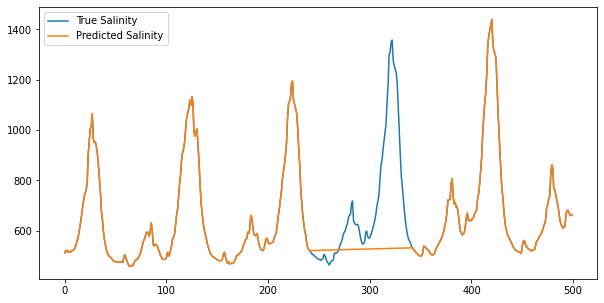

In [18]:
# Linear interpolation
def linear_interpolate(masked_salinity, mask):
    
    if len(masked_salinity.shape) < 2:
        # Find indicies of ones in the mask
        # 1's represent the true values
        x_true = np.where(mask ==  1)[0]
        y_true = masked_salinity[x_true]
        
        xvals = np.linspace(0, consecutive_samples-1, consecutive_samples)
        pred = np.interp(xvals, x_true, y_true)
        
        return pred
    
    
    predicted_salinity = np.zeros_like(masked_salinity)
    
    for n in range(masked_salinity.shape[0]):
        chunk_mask = mask[n]
        chunk_sal = masked_salinity[n]
        
        # Find indicies of ones in the mask
        # 1's represent the true values
        x_true = np.where(chunk_mask ==  1)[0]
        y_true = chunk_sal[x_true]

        
        xvals = np.linspace(0, consecutive_samples-1, consecutive_samples)
        predicted_salinity[n] = np.interp(xvals, x_true, y_true)
    

    return predicted_salinity


lin_pred = linear_interpolate(scaler.inverse_transform(plot_masked_sal), plot_mask)
xvals = np.linspace(0, consecutive_samples-1, consecutive_samples)

# inverse true salinity
temp_true = scaler.inverse_transform(plot_true)
plt.figure(figsize=(10,5))
plt.plot(xvals, temp_true[0], label="True Salinity")
plt.plot(xvals, lin_pred[0], label="Predicted Salinity")
plt.legend()
plt.show()

In [23]:
# predict data
# Include reserved plots in cummulative error calc
cumulative_test_sal = np.vstack((test_salinity, plot_masked_sal))
cumulative_test_mask = np.vstack((test_mask, plot_mask))
pred = single_station_CNN.predict([cumulative_test_sal, cumulative_test_mask])

# Reverse scale predicted salinity
# include reserved plots in truth
cumulative_truth_test = np.vstack((truth_test, plot_true))
pred = scaler.inverse_transform(pred)
lin_pred = scaler.inverse_transform(linear_interpolate(cumulative_test_sal, cumulative_test_mask))
iscaled_truth = scaler.inverse_transform(cumulative_truth_test)

cnn_mse = ((iscaled_truth - pred)**2)[cumulative_test_mask==0].mean()
cnn_mape = (np.abs(iscaled_truth - pred)/iscaled_truth)[cumulative_test_mask==0].mean()

lin_mse = ((iscaled_truth - lin_pred)**2)[cumulative_test_mask==0].mean()
lin_mape = (np.abs(iscaled_truth - lin_pred)/iscaled_truth)[cumulative_test_mask==0].mean()

print(f"CNN MSE: {cnn_mse:.3e}")
print(f"CNN MAPE: {cnn_mape:.2f}")

print(f"Lin MSE: {lin_mse:.3e}")
print(f"Lin MAPE: {lin_mape:.2f}")

CNN MSE: 2.801e+04
CNN MAPE: 0.09
Lin MSE: 2.890e+05
Lin MAPE: 0.25


### Plotting Some Reserved Data

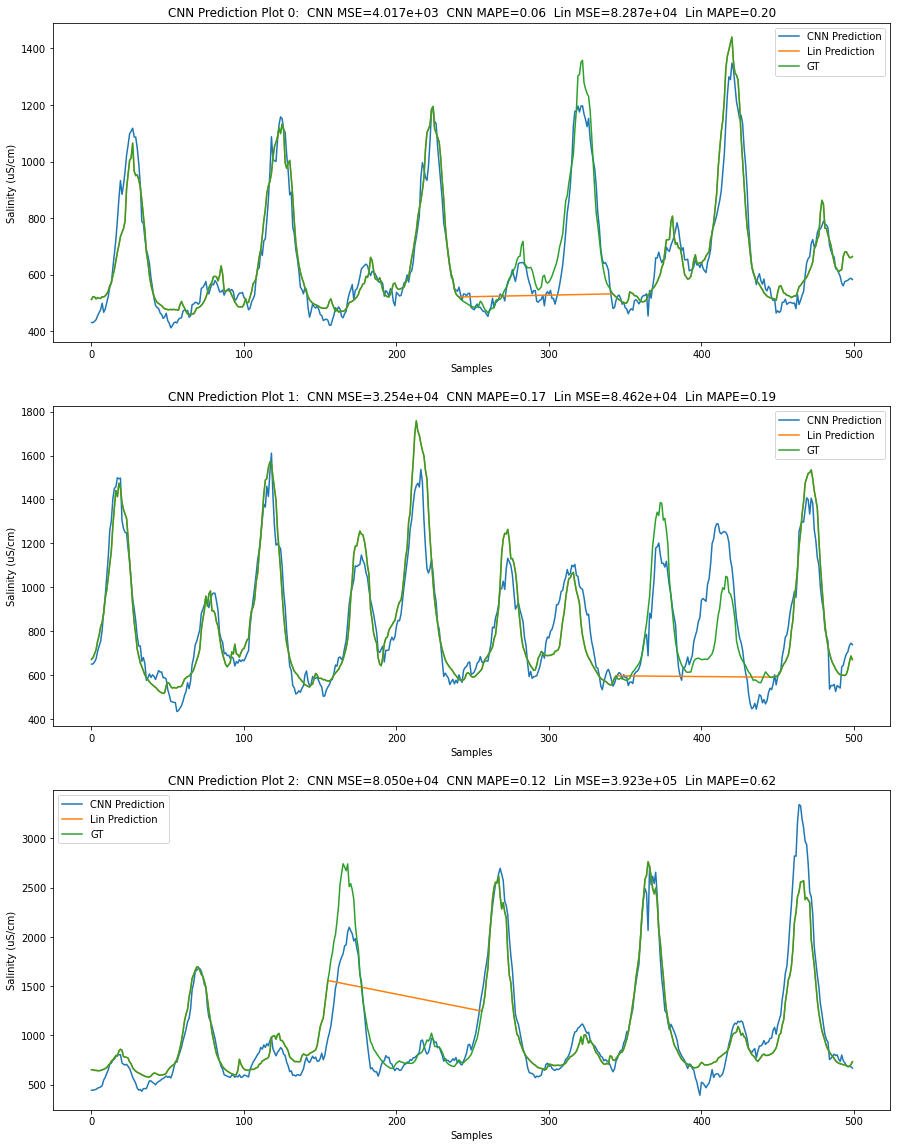

In [22]:
# Inverse scale
truth = scaler.inverse_transform(plot_true)
cnn_pred = scaler.inverse_transform(single_station_CNN.predict([plot_masked_sal, plot_mask]))
lin_pred = linear_interpolate(scaler.inverse_transform(plot_masked_sal), plot_mask)

fig, ax = plt.subplots(figs_to_plot, 1, figsize=(15,20))
for f in range(figs_to_plot):

    cnn_mse = ((truth[f] - cnn_pred[f])**2)[plot_mask[f]==0].mean()
    cnn_mape = (np.abs(truth[f] - cnn_pred[f])/truth[f])[plot_mask[f]==0].mean()
    
    lin_mse = ((truth[f] - lin_pred[f])**2)[plot_mask[f]==0].mean()
    lin_mape = (np.abs(truth[f] - lin_pred[f])/truth[f])[plot_mask[f]==0].mean()
    
    # Plot the figure
    ax[f].plot(np.linspace(0, consecutive_samples-1, consecutive_samples), cnn_pred[f], label="CNN Prediction")
    ax[f].plot(np.linspace(0, consecutive_samples-1, consecutive_samples), lin_pred[f], label="Lin Prediction")
    ax[f].plot(np.linspace(0, consecutive_samples-1, consecutive_samples), truth[f], label="GT")
    ax[f].title.set_text(f"CNN Prediction Plot {f}:  CNN MSE={cnn_mse:.3e}  CNN MAPE={cnn_mape:.2f}  Lin MSE={lin_mse:.3e}  Lin MAPE={lin_mape:.2f}")
    ax[f].set_xlabel("Samples")
    ax[f].set_ylabel("Salinity (uS/cm)")
    ax[f].legend()

# Show the figure
plt.show()
    